## Dataset

In [ ]:
import tensorflow as tf
import os

data_zip = tf.keras.utils.get_file('dataset.zip',
                                        extract=True,
                                        cache_subdir=os.path.abspath('.'),
                                        # origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip")
                                        # origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')
                                        origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/vangogh2photo.zip')


In [ ]:
os.mkdir('./output')
os.mkdir('./models')

## Build model

In [1]:
from model import CycleGAN

gan = CycleGAN(mode='train', base='resnet', verbose=False)
gan.build()
gan.compile(learning_rate=2e-4, cycle_loss_weight=3, identity_loss_weight=0, 
            disc_loss_weight=0.5, disc_2_loss_weight=0.5)

Using TensorFlow backend.


## Training

In [ ]:
gan.train('../dataset/cat2dog_clean/training_set/dogs/*.jpg', '../dataset/cat2dog_clean/training_set/cats/*.jpg', epochs=200, decay_from=100, 
          steps_per_epoch=3000, true_label_value=1, batch_size=1, image_save_path='../output/20190321/', model_save_path='../models/20190321/',
          save_image_every_step=100, save_model_every_epoch=1,
          show_image=True, load_model=False, model_load_path='../models/20190321/')

## Test

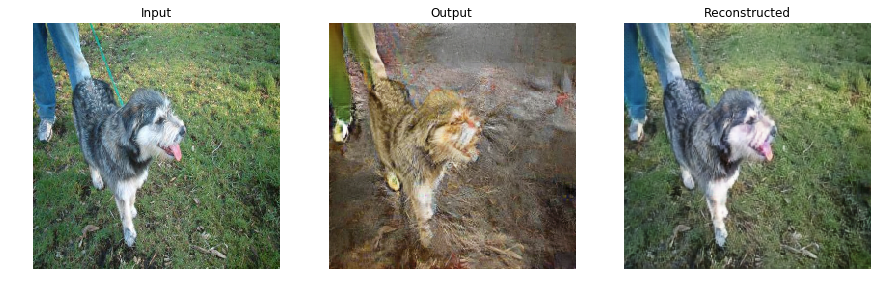

[Image 851] time: 0.29906558990478516
[Image 852] time: 0.10628604888916016
[Image 853] time: 0.10657668113708496
[Image 854] time: 0.10417437553405762
[Image 855] time: 0.10291647911071777
[Image 856] time: 0.09563446044921875
[Image 857] time: 0.0886237621307373
[Image 858] time: 0.09193968772888184
[Image 859] time: 0.1008305549621582
[Image 860] time: 0.08900618553161621
[Image 861] time: 0.10451006889343262
[Image 862] time: 0.08971095085144043
[Image 863] time: 0.1019432544708252
[Image 864] time: 0.10551285743713379
[Image 865] time: 0.1000051498413086
[Image 866] time: 0.0892634391784668
[Image 867] time: 0.10669350624084473
[Image 868] time: 0.1032869815826416
[Image 869] time: 0.09021663665771484
[Image 870] time: 0.09851264953613281
[Image 871] time: 0.0880277156829834
[Image 872] time: 0.09703707695007324
[Image 873] time: 0.09929418563842773
[Image 874] time: 0.09723496437072754
[Image 875] time: 0.09595608711242676
[Image 876] time: 0.10009551048278809
[Image 877] time: 0

In [3]:
gan.test('../dataset/cat2dog_clean/test_set/dogs/*.jpg', '../models/cat_2_dog_cl5/model-gan.h5', is_a2b=True,
         batch_size=1, image_save_path='../output/cat_2_dog_test_cl5/testA/', show_image=True, show_image_every_step=50)

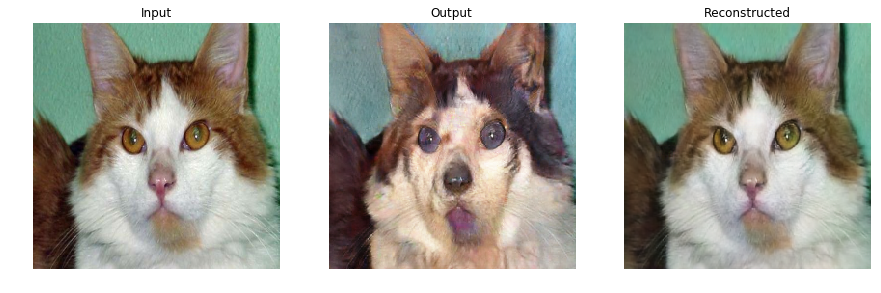

[Image 851] time: 0.35605764389038086
[Image 852] time: 0.10802650451660156
[Image 853] time: 0.0888669490814209
[Image 854] time: 0.10277318954467773
[Image 855] time: 0.10073423385620117
[Image 856] time: 0.09742856025695801
[Image 857] time: 0.10434818267822266
[Image 858] time: 0.09401726722717285
[Image 859] time: 0.09218311309814453
[Image 860] time: 0.1012418270111084
[Image 861] time: 0.08879399299621582
[Image 862] time: 0.10019779205322266
[Image 863] time: 0.0987999439239502
[Image 864] time: 0.08905243873596191
[Image 865] time: 0.0892019271850586
[Image 866] time: 0.10118722915649414
[Image 867] time: 0.09044694900512695
[Image 868] time: 0.10024833679199219
[Image 869] time: 0.09995150566101074
[Image 870] time: 0.09592771530151367
[Image 871] time: 0.09683704376220703
[Image 872] time: 0.1036672592163086
Test completed.


In [5]:
gan.test('../dataset/cat2dog_clean/test_set/cats/*.jpg', '../models/cat_2_dog_cl5/model-gan.h5', is_a2b=False,
         batch_size=1, image_save_path='../output/cat_2_dog_test_cl5/testB/', show_image=True, show_image_every_step=50)

## Save model to Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-disc-a.h5'})
uploaded.SetContentFile('./models/model-disc-a.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-disc-b.h5'})
uploaded.SetContentFile('./models/model-disc-b.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-gan.h5'})
uploaded.SetContentFile('./models/model-gan.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

## Get model from Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# os.makedirs('./logo_checkpoints/')
file_id = '1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-a.h5')
file_id = '1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-b.h5')
file_id = '1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-gan.h5')
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))